# Customer Churn Prediction using Deep  Learning

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

In [185]:
import warnings 
warnings.filterwarnings('ignore')

In [186]:
df = pd.read_csv(r"S:\My_Programms\Data Science\Dataset\Customer_Churn\Churn_Modelling.csv")

In [187]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [188]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [189]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [190]:
df.shape

(10000, 14)

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [192]:
df.duplicated().sum()

np.int64(0)

In [193]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [194]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [195]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [196]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [197]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [198]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [199]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True,dtype=int)

In [200]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [201]:
X = df.drop(columns=['Exited'])
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [202]:
y = df['Exited'].values
y

array([1, 0, 1, ..., 1, 1, 0], shape=(10000,))

In [203]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [204]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 11)
(2000, 11)
(8000,)
(2000,)


In [205]:
scaler = StandardScaler()

In [206]:
X_train_scaled = scaler.fit_transform(X_train)

In [207]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]], shape=(8000, 11))

In [208]:
X_test_scaled = scaler.transform(X_test)

In [209]:
X_test_scaled

array([[-1.03768121,  0.77498705, -1.0482813 , ..., -0.58312392,
        -0.57273139,  0.91509065],
       [ 0.30708683, -0.46686456, -0.70174202, ..., -0.58312392,
        -0.57273139,  0.91509065],
       [-1.23422423,  0.29735181, -1.0482813 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       ...,
       [-0.86182692, -0.46686456,  1.72403288, ..., -0.58312392,
         1.74601919,  0.91509065],
       [-0.30323097, -0.84897275, -1.0482813 , ...,  1.71490137,
        -0.57273139, -1.09278791],
       [ 0.04847759,  1.25262228,  1.3774936 , ...,  1.71490137,
        -0.57273139,  0.91509065]], shape=(2000, 11))

In [210]:
model = Sequential()

In [211]:
model.add(Dense(8,activation="relu",input_dim=11))
model.add(Dense(4,activation="relu"))
model.add(Dense(1,activation="sigmoid"))



In [212]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ (None, 8)              │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137 (548.00 B)

 Trainable params: 137 (548.00 B)

 Non-trainable params: 0 (0.00 B)

In [213]:
loss_function = BinaryCrossentropy()
optmizer = Adam()

In [214]:
model.compile(loss=loss_function,optimizer=optmizer,metrics=['accuracy'])

In [215]:
history = model.fit(X_train_scaled,y_train,epochs=50,validation_split=0.2)

Epoch 1/50


200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7386 - loss: 0.5743 - val_accuracy: 0.7975 - val_loss: 0.5146
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7983 - loss: 0.4849 - val_accuracy: 0.7994 - val_loss: 0.4715
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8016 - loss: 0.4554 - val_accuracy: 0.8094 - val_loss: 0.4479
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8041 - loss: 0.4392 - val_accuracy: 0.8138 - val_loss: 0.4343
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8127 - loss: 0.4279 - val_accuracy: 0.8169 - val_loss: 0.4229
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8205 - loss: 0.4184 - val_accuracy: 0.8163 - val_loss: 0.4117
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8272 - loss: 0.4084 - val_accuracy: 0.8244 - val_loss: 0.3997
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8355 - loss: 0.3978 - val_accuracy: 0.8356 - val_

In [216]:
model.layers[0].get_weights()

[array([[ 0.03130606, -0.00445272, -0.00159794,  0.06014198,  0.00961701,
         -0.35330075,  0.1910047 , -0.14909841],
        [-0.8114179 ,  0.13375397, -0.3875183 ,  0.13019457,  0.12790611,
          0.00451553,  0.70617086, -0.49285623],
        [-0.14756225, -0.08671629,  0.29265824,  0.32397166, -0.00918611,
          0.51362634,  0.08321538,  0.6394666 ],
        [-0.01159071, -0.36524856,  0.9310359 , -0.2629717 ,  0.3811699 ,
         -0.17233428, -0.22380632, -0.4475892 ],
        [ 0.1484064 , -0.98989636, -0.39946613, -0.23000136,  1.3426082 ,
          0.38968456,  0.18224995,  0.03597364],
        [-0.05441814, -0.00920853,  0.06407432,  0.5538662 ,  0.02385498,
          0.34549764,  0.13273938,  0.09565178],
        [-0.4786738 , -0.60655594, -0.2619812 ,  0.16214193, -0.37750864,
          0.06837466,  0.32322603,  0.6682331 ],
        [-0.01100775,  0.06990375, -0.00473761,  0.08513785,  0.02840746,
         -0.28814217,  0.3084273 , -0.08764561],
        [ 0.0368

In [217]:
model.layers[1].get_weights()

[array([[-0.8051771 ,  0.74890786, -0.82932526,  0.3491502 ],
        [ 0.72935253, -0.40561226,  1.0242877 , -0.17219496],
        [ 0.76707095,  0.15566896, -0.46788698, -0.50027776],
        [-0.06505182, -0.51314193, -0.55074024,  0.22479783],
        [ 0.01156099, -0.6855099 ,  1.3679587 , -0.33178937],
        [-0.12571649,  0.32121694,  0.00821156,  0.10095976],
        [ 0.70303714,  0.58651793, -0.13314554,  0.23796654],
        [-0.30928716,  0.81890017,  0.5192369 , -0.37421912]],
       dtype=float32),
 array([-0.12958384,  0.50501746,  0.00343716,  0.45108756], dtype=float32)]

In [218]:
y_log = model.predict(X_test_scaled)
y_log

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[0.0408611 ],
       [0.12864847],
       [0.06409166],
       ...,
       [0.01370566],
       [0.03945461],
       [0.30094087]], shape=(2000, 1), dtype=float32)

In [219]:
y_pred = np.where(y_log>0.5,1,0)

In [220]:
print(y_pred)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [221]:
accuracy_score(y_pred,y_test)

0.8595

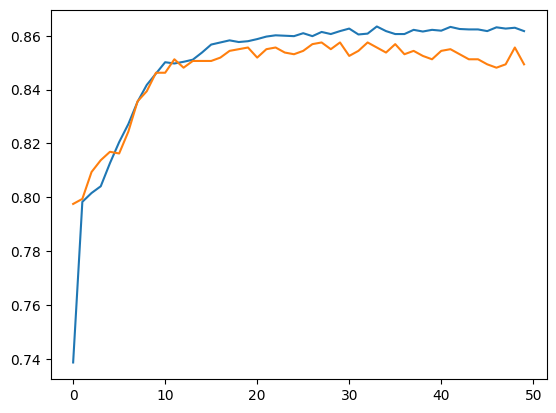

In [222]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

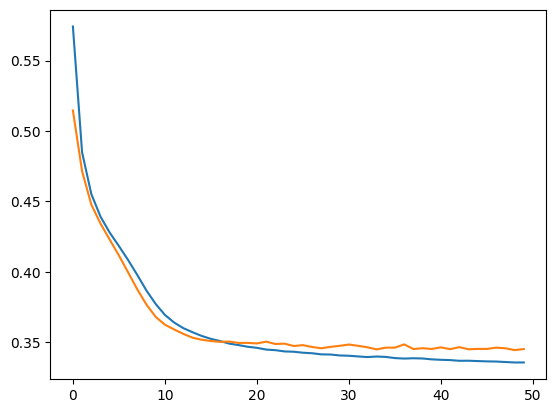

In [223]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])